In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv('./test_results/metrics.csv')
df_fm = df.loc[(df.model_name.str.startswith('PTST_fm')) & (df.model_name.str.len() > 15), ['model_name', 'test_data', 'mae', 'mse']]

def parse_name(name):
    parts = name.split('_')
    values = {'model_type': parts[0]+'_'+parts[1]}
    for part in parts[2:]:
        key, value = part.split('-',1)
        values[key] = value    
    return values

parsed_values = df_fm['model_name'].apply(parse_name)

idx = parsed_values.index
d = pd.DataFrame(list(parsed_values))
d = d.set_index(idx)

df_fm = df_fm.join(d)

def convert_lr(lr_str):
    return float(lr_str.replace('e', 'E'))

# Apply the function to create the new column
df_fm['lr_n'] = df_fm['lr'].apply(convert_lr)

In [6]:
df_fm

,model_name,test_data,mae,mse,model_type,lr,pt,th,ft,lr_n
510,PTST_fm_lr-1e-4_pt-1_th-1_ft-1,odd_sine,0.624109,0.586192,PTST_fm,1e-4,1,1,1,1.000000e-04
511,PTST_fm_lr-1e-4_pt-1_th-1_ft-1,even_sine,0.612139,0.558314,PTST_fm,1e-4,1,1,1,1.000000e-04
512,PTST_fm_lr-1e-4_pt-1_th-1_ft-1,trends,0.315861,0.151347,PTST_fm,1e-4,1,1,1,1.000000e-04
513,PTST_fm_lr-1e-4_pt-1_th-1_ft-1,combination,0.881150,1.307954,PTST_fm,1e-4,1,1,1,1.000000e-04
514,PTST_fm_lr-1e-4_pt-1_th-1_ft-1,joker,0.384885,0.224894,PTST_fm,1e-4,1,1,1,1.000000e-04
...,...,...,...,...,...,...,...,...,...,...
925,PTST_fm_lr-1e-7_pt-1_th-1_ft-5,odd_sine,0.875981,1.169855,PTST_fm,1e-7,1,1,5,1.000000e-07
926,PTST_fm_lr-1e-7_pt-1_th-1_ft-5,even_sine,0.833193,1.074645,PTST_fm,1e-7,1,1,5,1.000000e-07
927,PTST_fm_lr-1e-7_pt-1_th-1_ft-5,trends,0.360276,0.191055,PTST_fm,1e-7,1,1,5,1.000000e-07
928,PTST_fm_lr-1e-7_pt-1_th-1_ft-5,combination,1.172798,2.400886,PTST_fm,1e-7,1,1,5,1.000000e-07


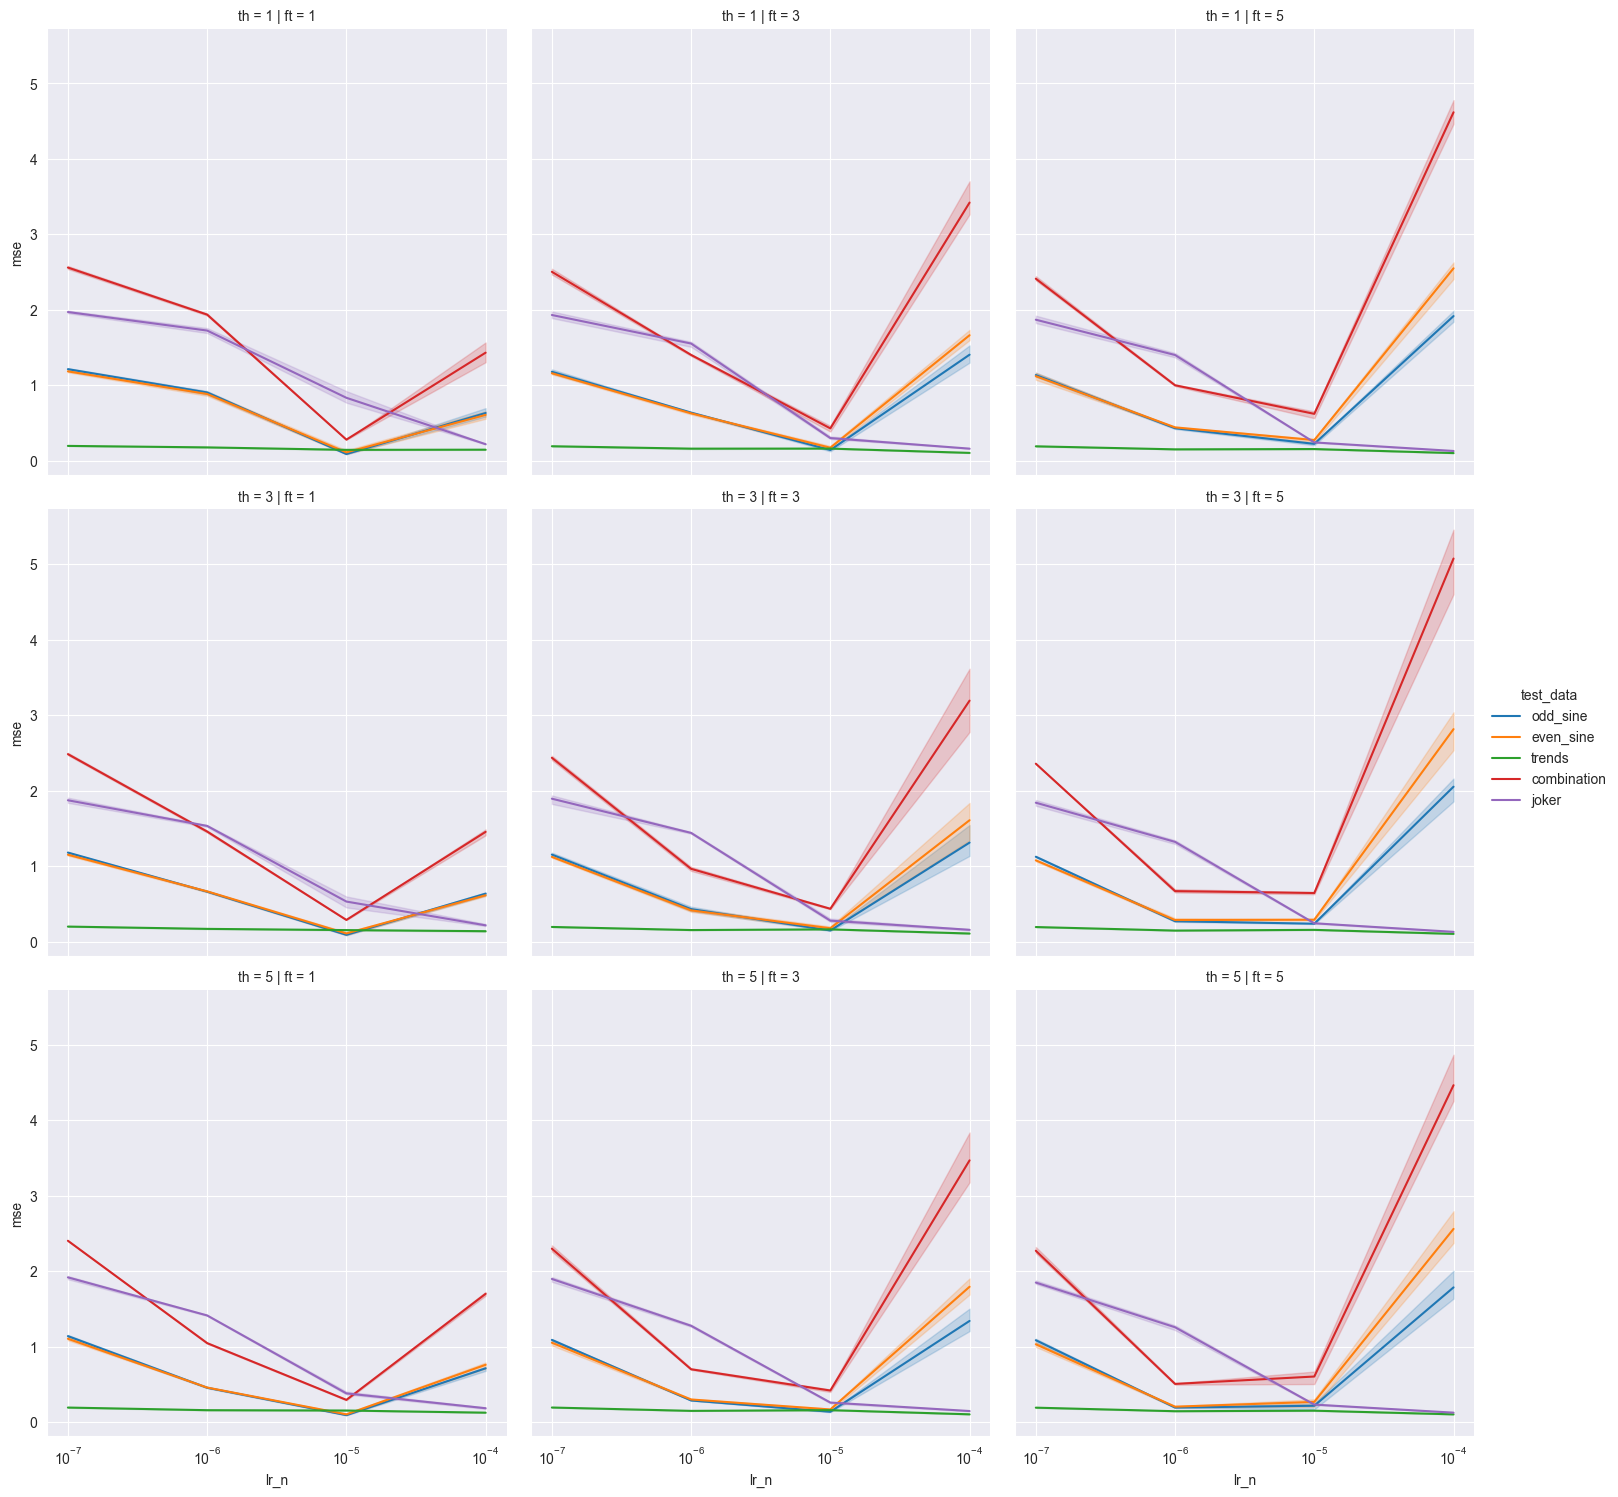

In [14]:
g = sns.relplot(
    data = df_fm,
    kind='line',
    x = 'lr_n',
    y = 'mse',
    hue = 'test_data',
    col = 'ft',
    row = 'th'
)
g.set(xscale="log")